# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.DataFrame(pd.read_csv('ames.csv'))
continuousColumns = []
for x in ames.dtypes.loc[ames.dtypes == 'int64'].index:
    continuousColumns.append(x)
continuousColumns.pop(0)
continuousColumns


['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

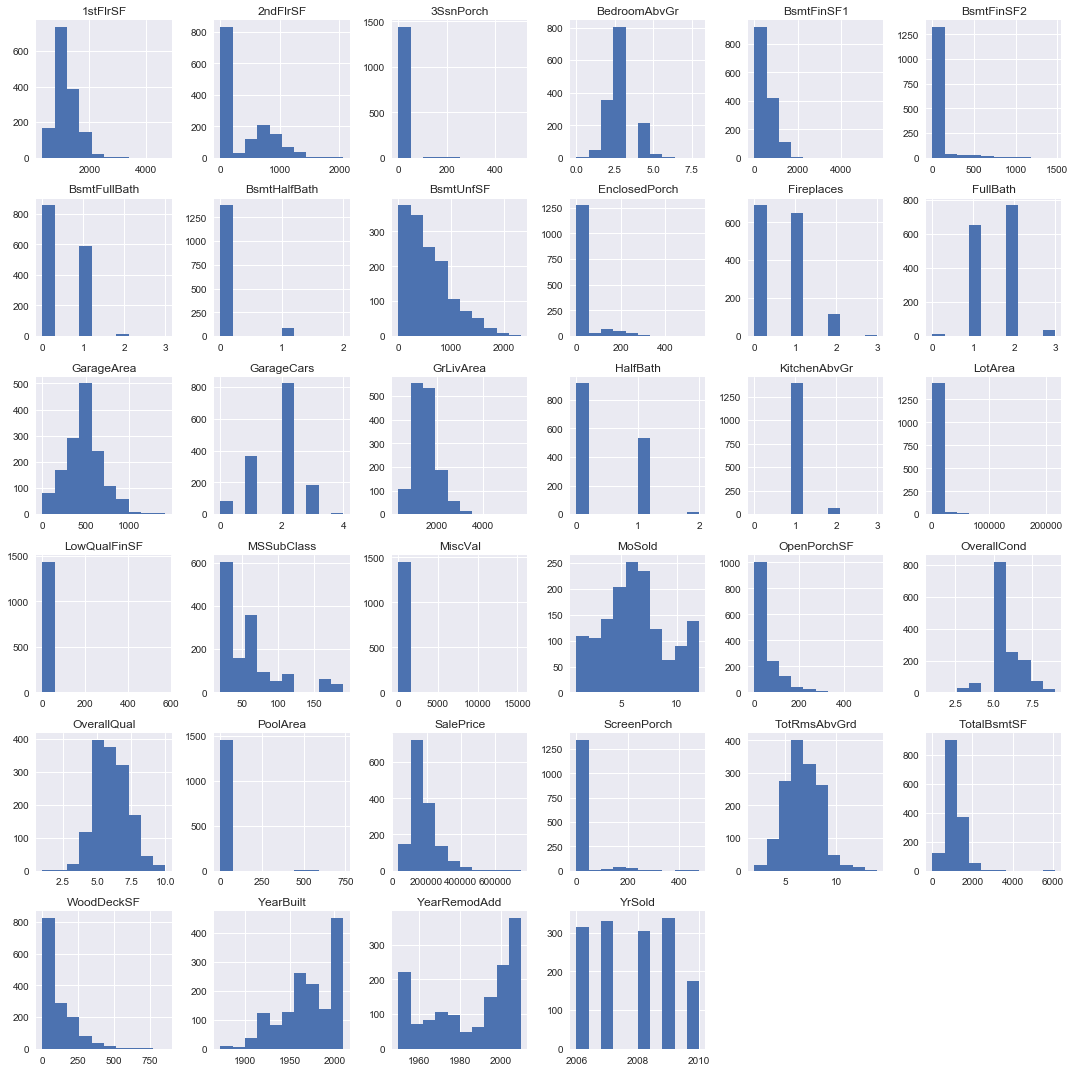

In [2]:
ames[continuousColumns].hist(figsize = [15,15]);
plt.tight_layout()
plt.show()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [3]:
sum(ames['LotArea'] == 0)

0

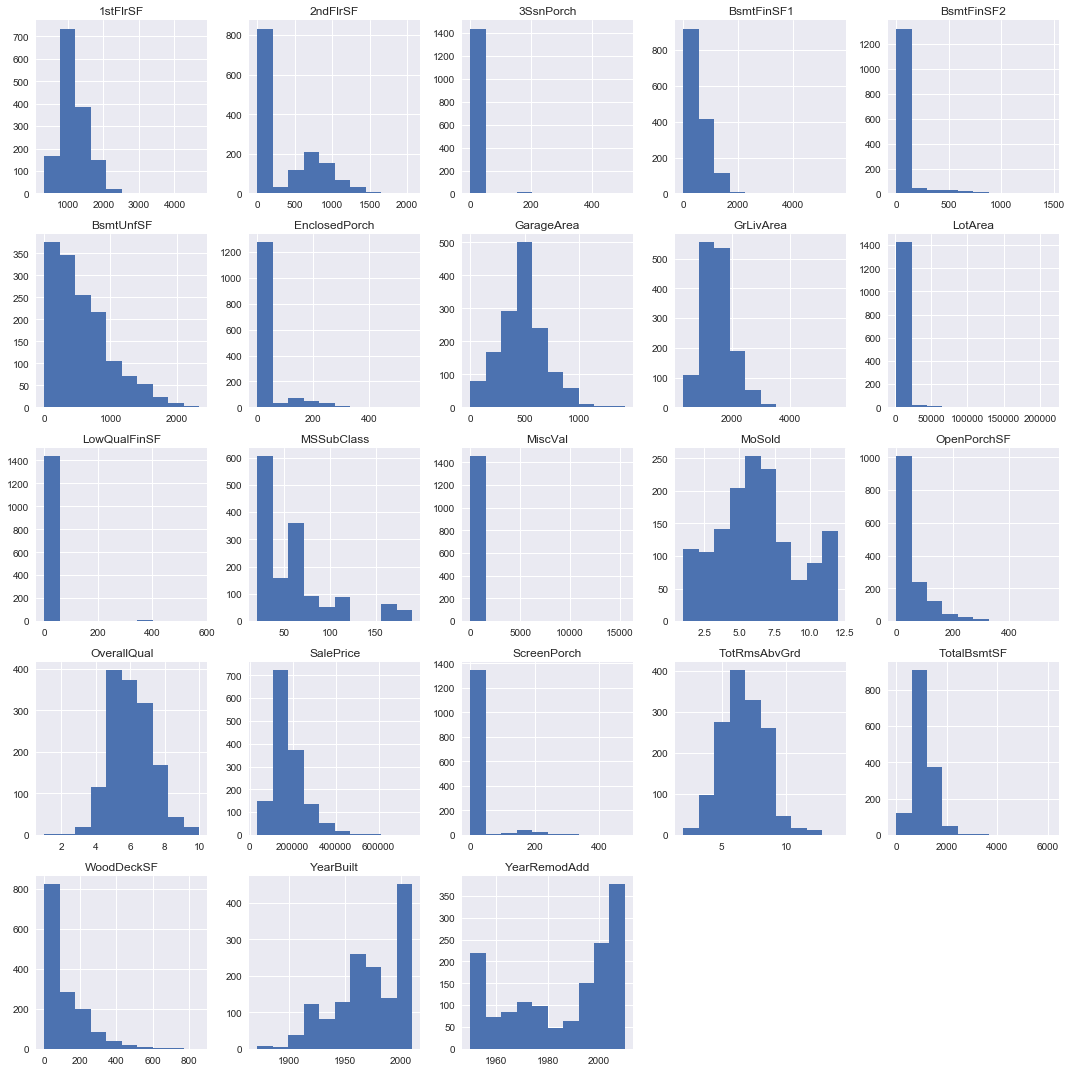

In [4]:
# Select non zero-inflated continuous features as ames_cont
contColumns = []
for x in continuousColumns:
    if len(set(ames[x])) < 10:
        pass
    else:
        contColumns.append(x)
ames[contColumns].hist(figsize = [15,15]);
plt.tight_layout()
plt.show()

## Perform log transformations for the variables where it makes sense

In [8]:
import numpy as np

ames_processed = ames[contColumns].applymap(lambda x : np.log(x+.01))
ames_processed.drop(labels = ['BsmtFinSF2', 'WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal','2ndFlrSF','LowQualFinSF',],axis = 1, inplace = True)
ames_processed.head()

,MSSubClass,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,TotRmsAbvGrd,GarageArea,MoSold,SalePrice
0,4.094511,9.041923,1.947338,7.602406,7.602406,6.559629,5.010702,6.752282,6.752282,7.444254,2.080691,6.306294,0.698135,12.247694
1,2.996232,9.169519,1.793425,7.588835,7.588835,6.885520,5.649009,7.140461,7.140461,7.140461,1.793425,6.131248,1.611436,12.109011
2,4.094511,9.328124,1.947338,7.601407,7.601907,6.186229,6.073068,6.824385,6.824385,7.487739,1.793425,6.410191,2.198335,12.317167
3,4.248638,9.164297,1.947338,7.557478,7.585794,5.375325,6.291588,6.628055,6.867985,7.448340,1.947338,6.464604,0.698135,11.849398
4,4.094511,9.565214,2.080691,7.600907,7.600907,6.484651,6.194426,7.043169,7.043169,7.695308,2.198335,6.728641,2.485740,12.429216


## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

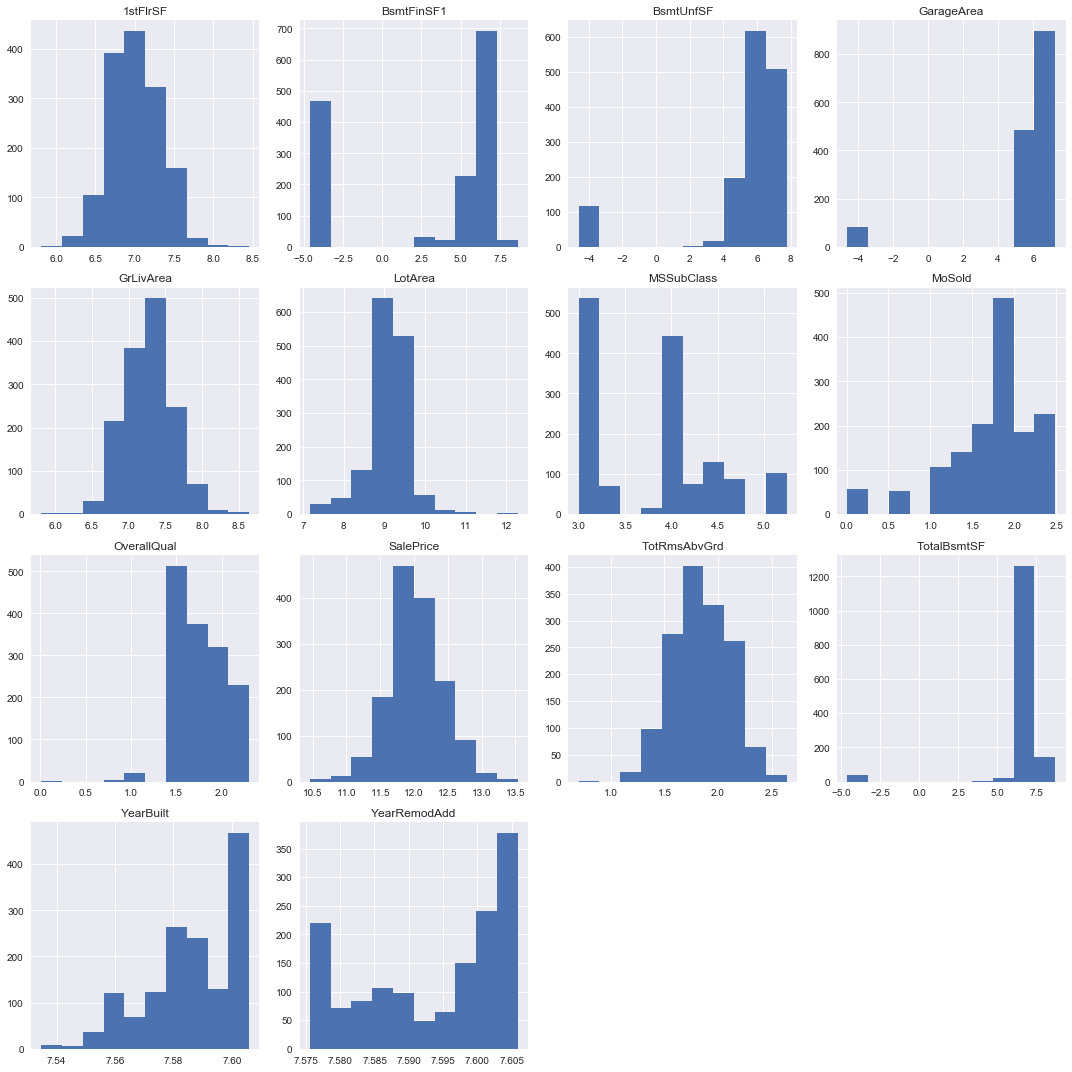

In [9]:
ames_processed.hist(figsize = [15,15]);
plt.tight_layout()
plt.show()

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!